# __Capstone Project: Predicting E-Commerce Product Recommendations__
---



![](https://github.com/dipanjanS/feature_engineering_session_dhs18/blob/master/ecommerce_product_ratings_prediction/clothing_banner.jpg?raw=1)


__Background:__

This is a classic NLP problem dealing with data from an e-commerce store focusing on women's clothing. Each record in the dataset is a customer review which consists of the review title, text description and a rating (ranging from 1 - 5) for a product amongst other features. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”. 


<br/>

__Main Objective:__ 

Leverage the review text attributes amongst other structured features to build a supervised predictive model to predict if the product is recommended by the customer or not (1 or 0) based on the given attributes (and derived features)

<br/>

__Objectives for the capstone:__

- Phase 1: Data Retrieval and Understanding
- Phase 2: Basic Exploratory Data Analysis
- Phase 3: Feature Engineering and Modeling
- Phase 4: Evaluation, Insights, Recommendations and Report



# ___Phase 1: Data Retrieval and Understanding___

## Load up basic dependencies

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
import string
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
from string import punctuation

## Load and View the Dataset

The data is available at https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews 


In [ ]:
df = pd.read_csv('https://github.com/dipanjanS/text-analytics-with-python/raw/master/media/Womens%20Clothing%20E-Commerce%20Reviews%20-%20NLP.csv', keep_default_na=False)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Check dataset details

In [ ]:
df.shape

(23486, 10)

This dataset includes 23486 rows and 10 columns (features). 

Each row corresponds to a customer review, and includes the features:

- __Clothing ID:__ Integer Categorical variable that refers to the specific piece being reviewed.
- __Age:__ Positive Integer variable of the reviewers age.
- __Title:__ String variable for the title of the review.
- __Review Text:__ String variable for the review body.
- __Rating:__ Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- __Recommended IND:__ Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- __Positive Feedback Count:__ Positive Integer documenting the number of other customers who found this review positive.
- __Division Name:__ Categorical name of the product high level division.
- __Department Name:__ Categorical name of the product department name.
- __Class Name:__ Categorical name of the product class name.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


## Basic Data Processing__

Combine review __Title__ and __Review Text__ into one text column called __Review__ which can be used later for NLP tasks.

In [ ]:
# create column review
df['Review'] = df["Title"]+ df["Review Text"]
#df.info()
# remove 'Title' and 'Review Text' Columns
df = df.drop(columns=['Title', 'Review Text'])

# view dataframe
df.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu..."
4,847,47,5,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...


Check for are any blank reviews!

In [ ]:
sum(df['Review'] == '')

844

Looks like we have 844 reviews with no text! We definitely need to remove them

## Remove all records with no review text__


In [ ]:
df['Review'].replace('', np.nan, inplace=True)
df.dropna(subset=['Review'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22642 non-null  int64 
 1   Age                      22642 non-null  int64 
 2   Rating                   22642 non-null  int64 
 3   Recommended IND          22642 non-null  int64 
 4   Positive Feedback Count  22642 non-null  int64 
 5   Division Name            22642 non-null  object
 6   Department Name          22642 non-null  object
 7   Class Name               22642 non-null  object
 8   Review                   22642 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


### Rename the Recommended IND column


In [ ]:
df = df.rename(columns={'Recommended IND':'Recommended'})
df.head(3)

,Clothing ID,Age,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...


# ___Phase 2: Exploratory Data Analysis___



## Viewing distribution of recommended products

The number of products recommended and not recommended by customers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

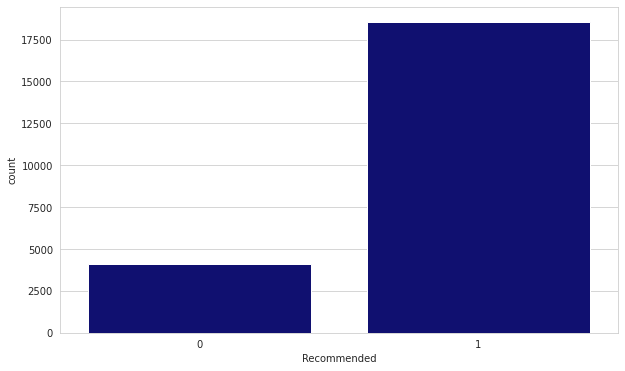

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Recommended', data=df, color='navy');

## The distribution of reviews based on ratings__


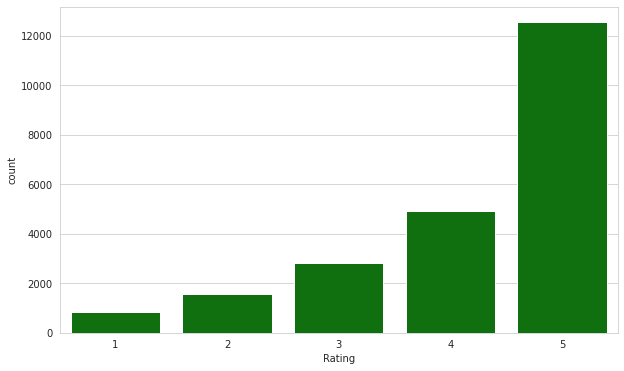

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, color='green');

## Let's visualize Ratings vs. Recommendations

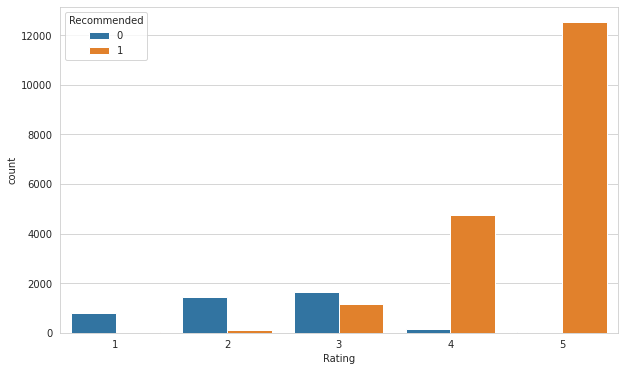

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', hue='Recommended', data=df);

This makes it clear that low ratings (1-2) lead to customers not recommending products and high ratings (4-5) lead to customers recommending products.

This is a data\target leakage where we want to predict a variable (Recommended) using other features, however there are features like 'Rating' which indirectly relate very strongly to 'Recommendation'. 

Hence to build an unbiased predictive model in future modules, it is recommended to drop this column.

## Drop the Rating column__



In [ ]:
df = df.drop(columns='Rating')
df.head(4)

,Clothing ID,Age,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu..."


## View the distribution of reviews based on product Class Name


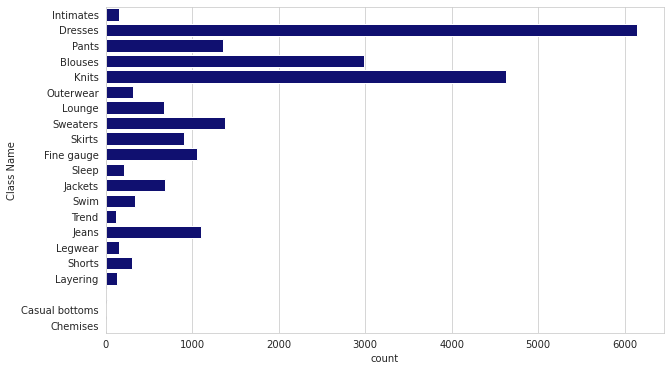

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Class Name', data=df, color='navy');

## Show the distribution of reviews based on Department Name__


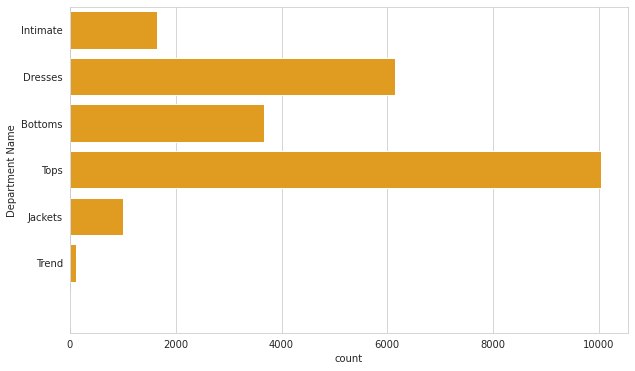

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Department Name', data=df, color='orange');

## Viewing distributions of Age and Positive Feedback on Reviews

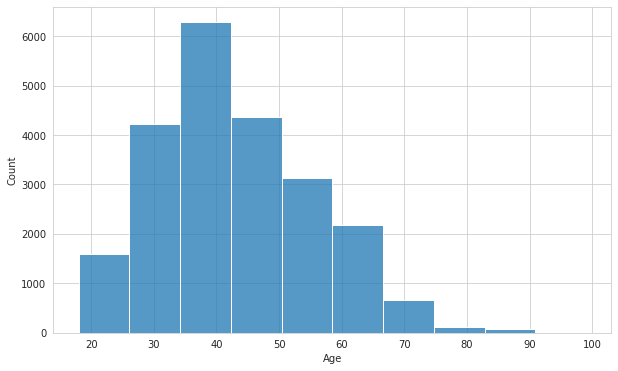

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', bins=10, data=df);

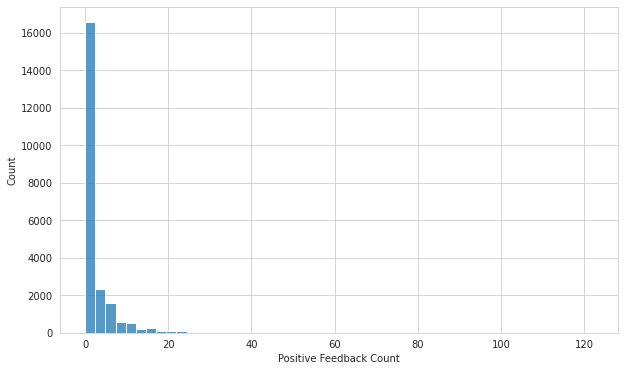

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Positive Feedback Count', bins=50, data=df);

## Viewing top 10 product IDs reviewed by customers

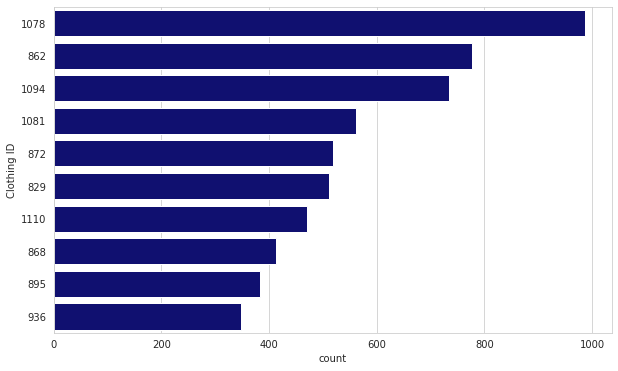

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Clothing ID', data=df, color='navy', 
              order=df['Clothing ID'].value_counts().iloc[:10].index);

## Show number of customers who recommended or didn't recommend the top 10 most reviewed products__


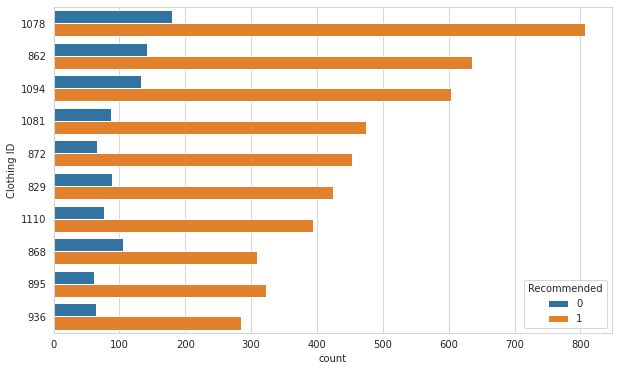

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Clothing ID', data=df, hue='Recommended', 
              order=df['Clothing ID'].value_counts().iloc[:10].index);

## How long are the customer reviews (review lengths)__



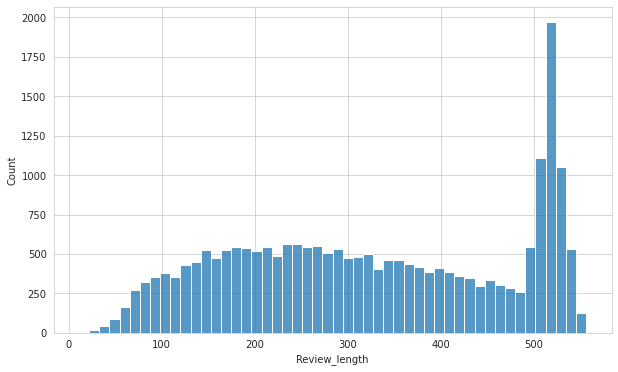

In [ ]:
df['Review_length'] = df['Review'].str.len()
#df.head()
#print(Review_length)
plt.figure(figsize=(10, 6))
sns.histplot(x='Review_length', bins=50, data=df);

In [ ]:
# code to remove the Review length column
df = df.drop(columns='Review_length')
df.head(4)


,Clothing ID,Age,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu..."


## How many words per review (word counts per review)__



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
import string
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
from string import punctuation


def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"https?://\S+", "", text) # remove url
    text = re.sub(r"\b[0-9]+\b\s*", "", text) # remove numbers
    tokens = text.split()# Remove extra spaces, tabs, and new lines
    clean_text = ",".join(tokens)
    return clean_text

df['Review_Words']=df["Review"].map(preprocess_text)
feature_col = 'Review_Words'
df['Review_Words_Counts'] = df[feature_col].apply(lambda x: len(x.split(',')))
df.head()    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Clothing ID,Age,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review,Review_Words,Review_Words_Counts
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,"absolutely,wonderful,silky,and,sexy,and,comfor...",7
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,"love,this,dress,its,sooo,pretty,i,happened,to,...",61
2,1077,60,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"some,major,design,flawsi,had,such,high,hopes,f...",100
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","my,favorite,buyi,love,love,love,this,jumpsuit,...",24
4,847,47,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,"flattering,shirtthis,shirt,is,very,flattering,...",37


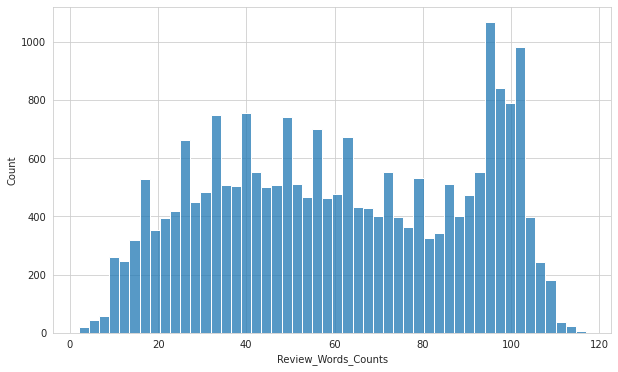

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Review_Words_Counts', bins=50, data=df);

# ___Phase 3: Feature Engineering and Modeling___

Aim:

- Use structured features along with non-vectorized features to build classsifiers
- Use vectorization methods like BOW and build classifiers
- Combine vectorized and structured features and build classifiers
- Try out different classifiers and check their performance

## View the dataset

In [ ]:
df.head()

,Clothing ID,Age,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review,Review_Words,Review_Words_Counts
0,767,33,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,"absolutely,wonderful,silky,and,sexy,and,comfor...",7
1,1080,34,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,"love,this,dress,its,sooo,pretty,i,happened,to,...",61
2,1077,60,0,0,General,Dresses,Dresses,Some major design flawsI had such high hopes f...,"some,major,design,flawsi,had,such,high,hopes,f...",100
3,1049,50,1,0,General Petite,Bottoms,Pants,"My favorite buy!I love, love, love this jumpsu...","my,favorite,buyi,love,love,love,this,jumpsuit,...",24
4,847,47,1,6,General,Tops,Blouses,Flattering shirtThis shirt is very flattering ...,"flattering,shirtthis,shirt,is,very,flattering,...",37


## Subset out unnecessary features

In [ ]:
df = df[['Review', 'Age', 'Positive Feedback Count', 'Recommended']]
df.head()

,Review,Age,Positive Feedback Count,Recommended
0,Absolutely wonderful - silky and sexy and comf...,33,0,1
1,Love this dress! it's sooo pretty. i happene...,34,4,1
2,Some major design flawsI had such high hopes f...,60,0,0
3,"My favorite buy!I love, love, love this jumpsu...",50,0,1
4,Flattering shirtThis shirt is very flattering ...,47,6,1


#### There is some imbalance in the data based on product recommendations

In [ ]:
df['Recommended'].value_counts()

1    18541
0     4101
Name: Recommended, dtype: int64

## Build train and test datasets

We use a standard 70:30 split here

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Recommended']), df['Recommended'], test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((15849, 3), (6793, 3))

In [ ]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({0: 2883, 1: 12966}), Counter({0: 1218, 1: 5575}))

In [ ]:
X_train.head(3)

,Review,Age,Positive Feedback Count
4654,Sexy and flowsI love this jumpsuit! i'm usuall...,79,8
5333,Wanted to love itThe dresss is much shorter th...,32,3
22502,So cute! though inside not softI got the cream...,34,0


In [ ]:
y_train[:3]

4654     1
5333     0
22502    1
Name: Recommended, dtype: int64

## Building predictive models for product recommendation__

- __Experiment 1:__ Basic NLP Count based features, Structured Features (Age and Feedback Count) + Logistic Regression

- __Experiment 2:__ Features from Sentiment Analysis + Logistic Regression

- __Experiment 3:__ BOW features (1-gram) + Logistic Regression

- __Experiment 4:__ BOW features (2-gram) + Logistic Regression

- __Experiment 5:__ BOW features (3-gram) + Logistic Regression

- __Experiment 6:__ BOW features (3-gram) + Feature Selection + Logistic Regression

- __Experiment 7:__ BOW features (3-gram) + Feature Selection + Structuref Features (Age and Feedback Count) + Logistic Regression

- __Experiment 8:__ Same as Experiment 7 but use TF-IDF features



### __Experiment 1: Basic NLP Count based Features & Age, Feedback Count__

A number of basic text based features can also be created which sometimes are helpful for improving text classification models. 
Some examples are:

- __Word Count:__ total number of words in the documents
- __Character Count:__ total number of characters in the documents
- __Average Word Density:__ average length of the words used in the documents
- __Puncutation Count:__ total number of punctuation marks in the documents
- __Upper Case Count:__ total number of upper count words in the documents
- __Title Word Count:__ total number of proper case (title) words in the documents



In [ ]:
import string

feature_col = 'Review'
X_train['char_count'] = X_train[feature_col].apply(len)
X_train['word_count'] = X_train[feature_col].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
X_train['punctuation_count'] = X_train[feature_col].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_train['title_word_count'] = X_train[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_train['upper_case_word_count'] = X_train[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


X_test['char_count'] = X_test[feature_col].apply(len)
X_test['word_count'] = X_test[feature_col].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
X_test['punctuation_count'] = X_test[feature_col].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))  
X_test['title_word_count'] = X_test[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_test['upper_case_word_count'] = X_test[feature_col].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
X_train.head()

,Review,Age,Positive Feedback Count,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
4654,Sexy and flowsI love this jumpsuit! i'm usuall...,79,8,468,94,4.926316,17,1,0
5333,Wanted to love itThe dresss is much shorter th...,32,3,143,25,5.500000,4,1,0
22502,So cute! though inside not softI got the cream...,34,0,450,92,4.838710,14,1,0
392,Lovely fabric but tiny hipsIf your hips are bi...,34,0,395,82,4.759036,6,1,0
372,"So coolThis has great drape, length, the patte...",57,1,291,55,5.196429,10,1,0


#### Initializing a Logistic Regression Model 

A logistic regression model is easy to train, interpret and works well on a wide variety of NLP problems. We initialize a Logistic Regression Model here.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='lbfgs', max_iter=1e4)

#### Model Evaluation Metrics 

Just accuracy is never enough in datasets with a rare class problem.

- __Precision:__ The positive predictive power of a model. Out of all the predictions made by a model for a class, how many are actually correct
- __Recall:__ The coverage or hit-rate of a model. Out of all the test data samples belonging to a class, how many was the model able to predict (hit or cover) correctly.
- __F1-score:__ The harmonic mean of the precision and recall

#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# fit model here (remember to drop the Review column)
X_train1 = X_train.drop(columns='Review')
X_test1 = X_test.drop(columns='Review')
#X_train.head(4)
#X_train.head(4)
lr.fit(X_train1,y_train)
# predict on the test dataframe (remember to drop the Review column)
predictions = lr.predict(X_test1)

# evaluate model performance
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[   0 1218]
 [   2 5573]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1218
           1       0.82      1.00      0.90      5575

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.67      0.82      0.74      6793



We have a really bad model here meaning the features were completely useless! 

Can we do better? Let's first drop those not so useful features.

In [ ]:
X_train.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)
X_test.drop(['char_count', 'word_count', 'word_density', 
              'punctuation_count', 'title_word_count', 'upper_case_word_count'], axis=1, inplace=True)

### __Experiment 2: Features from Sentiment Analysis__ 

This is unsupervised, lexicon-based sentiment analysis where we don't have any pre-labeled data saying which review might have a positive or negative sentiment. We use the lexicon to determine this.

#### Leveraging Text Sentiment

Reviews are pretty subjective, opinionated and people often express stong emotions, feelings. 
This makes it a classic case where the text documents here are a good candidate for extracting sentiment as a feature.

The general expectation is that highly rated and recommended products (__label 1__) should have a __positive__ sentiment and products which are not recommended (__label 0__) should have a __negative__ sentiment.

TextBlob is an excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. 

- The polarity score is a float within the range [-1.0, 1.0]. 
- The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. 

Perhaps this could be used for getting some new features. Let's look at some basic examples.

In [ ]:
import textblob

textblob.TextBlob('This is an AMAZING pair of Jeans!').sentiment

Sentiment(polarity=0.7500000000000001, subjectivity=0.9)

In [ ]:
textblob.TextBlob('I really hated this UGLY T-shirt!!').sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

Looks like this should help us get features which can distinguish between good and bad products. Let's try it out on our dataset!

In [ ]:
# remember to get the polarity and subjectivity fields as you learnt in feature engineering

X_train_snt_obj = X_train['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in X_train_snt_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in X_train_snt_obj.values]

# remember to get the polarity and subjectivity fields as you learnt in feature engineering
X_test_snt_obj = X_test['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in X_test_snt_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in X_test_snt_obj.values]

In [ ]:
X_train.head()

,Review,Age,Positive Feedback Count,Polarity,Subjectivity
4654,Sexy and flowsI love this jumpsuit! i'm usuall...,79,8,0.237380,0.641259
5333,Wanted to love itThe dresss is much shorter th...,32,3,0.260000,0.400000
22502,So cute! though inside not softI got the cream...,34,0,0.208854,0.589583
392,Lovely fabric but tiny hipsIf your hips are bi...,34,0,0.114286,0.610440
372,"So coolThis has great drape, length, the patte...",57,1,0.314583,0.738889


#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
# fit model here (remember to drop the Review column)
X_train2 = X_train.drop(columns='Review')
X_test2 = X_test.drop(columns='Review')
lr.fit(X_train2,y_train)
# predict on the test dataframe (remember to drop the Review column)
predictions2 = lr.predict(X_test2)

# evaluate model performance
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))

[[ 168 1050]
 [  95 5480]]
              precision    recall  f1-score   support

           0       0.64      0.14      0.23      1218
           1       0.84      0.98      0.91      5575

    accuracy                           0.83      6793
   macro avg       0.74      0.56      0.57      6793
weighted avg       0.80      0.83      0.78      6793



This is a better model than Experiment 1

Can we still improve on our model since the recall of bad reviews is still pretty low?

#### __Text Pre-processing and Wrangling__

We want to extract some specific features based on standard NLP feature engineering models like the classic Bag of Words model.
For this we need to clean and pre-process our text data. We will build a simple text pre-processor here since the main intent is to look at feature engineering strategies.

Focus is on:
- Text Lowercasing
- Removal of contractions
- Removing unnecessary characters, numbers and symbols
- Stopword removal

In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm

In [ ]:
import nltk
import contractions
import re
import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# remove some stopwords to capture negation in n-grams later on if possible
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('not')
stopwords.remove('but')

# FILL THIS IN
def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        # fix contractions
        doc = contractions.fix(doc)
        # remove special characters and digits
        #doc = re.sub(r'([^a-zA-Z ]+?)',' ', doc)
        doc = re.sub(r'[^a-zA-Z\s]', '',doc, re.I|re.A)
        # lower case
        doc = doc.lower()
        # strip whitespaces
        doc = re.sub(' +', ' ',doc)
        # tokenize document
        tokens=nltk.word_tokenize(doc)
        #filter stopwords out of document
        doc_tokens = [token for token in tokens if token not in stopwords]
        # re-create document from filtered tokens
        #doc_tokens = list(filter(None, doc_tokens))
        doc_tokens = ' '.join(doc_tokens)
        # append doc to norm_docs
        if doc_tokens:
            norm_docs.append(doc_tokens)

    return norm_docs


In [ ]:
X_train['Clean Review'] = normalize_corpus(X_train['Review'])
X_test['Clean Review'] = normalize_corpus(X_test['Review'])


100%|██████████| 6793/6793 [00:03<00:00, 1962.20it/s]


#### Remove the review column now since we don't need it anymore and restructure our dataframes

In [ ]:
X_train = X_train[['Clean Review', 'Age', 'Positive Feedback Count', 'Polarity', 'Subjectivity']]
X_test = X_test[['Clean Review', 'Age', 'Positive Feedback Count', 'Polarity', 'Subjectivity']]

X_train.head()

,Clean Review,Age,Positive Feedback Count,Polarity,Subjectivity
4654,sexy flowsi love jumpsuit usually size small h...,79,8,0.237380,0.641259
5333,wanted love itthe dresss much shorter describe...,32,3,0.260000,0.400000
22502,cute though inside not softi got cream color a...,34,0,0.208854,0.589583
392,lovely fabric but tiny hipsif hips bigger size...,34,0,0.114286,0.610440
372,coolthis great drape length pattern super vers...,57,1,0.314583,0.738889


### Extracting out the structured features from previous experiments

__We will extract out the structured columns \ features so we can use them later on after doing a few experiments with bag of words 

`X_train_struct` and `X_test_struct` should contain only 4 columns i.e.

- Age
- Positive Feedback Count
- Polarity
- Subjectivity

In [ ]:
X_train_struct = X_train.drop(['Clean Review'], axis=1).reset_index(drop=True)
X_test_struct = X_test.drop(['Clean Review'], axis=1).reset_index(drop=True)

X_train_struct.head()

,Age,Positive Feedback Count,Polarity,Subjectivity
0,79,8,0.237380,0.641259
1,32,3,0.260000,0.400000
2,34,0,0.208854,0.589583
3,34,0,0.114286,0.610440
4,57,1,0.314583,0.738889


### __Experiment 3: Modeling based on Bag of Words based Features - 1-grams__

This is perhaps the most simple vector space representational model for unstructured text. A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute. 

The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values. 

The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.


In [ ]:
train_clean_text = X_train['Clean Review']
test_clean_text = X_test['Clean Review']

#### Using the following default config for count vectorizer

- `min_df` as 0.0
- `max_df` as 1.0
- `ngram_range` as (1,1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.0, max_df=1.0,ngram_range=(1,1))

X_traincv = cv.fit_transform(train_clean_text)

X_testcv = cv.transform(test_clean_text)
#X_traincv = train_clean_text.apply(lambda x: cv.fit_transform(x))
#X_testcv = test_clean_text.apply(lambda x: cv.fit_transform(x))

In [ ]:
X_traincv

<15849x20463 sparse matrix of type '<class 'numpy.int64'>'
	with 450363 stored elements in Compressed Sparse Row format>

#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
# fit model here
lr.fit(X_traincv,y_train)

# predict on the test vectors
predictions3 = lr.predict(X_testcv)

# evaluate model performance
print(confusion_matrix(y_test, predictions3))
print(classification_report(y_test, predictions3))

[[ 787  431]
 [ 266 5309]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      1218
           1       0.92      0.95      0.94      5575

    accuracy                           0.90      6793
   macro avg       0.84      0.80      0.82      6793
weighted avg       0.89      0.90      0.89      6793



This looks promising and far better that the previous models.

Can we still improve on our model? Let's look at n-grams!

### __Experiment 4: Modeling with Bag of Words based Features - 2-grams__

We use the same feature engineering technique here except we consider both 1 and 2-grams as our features. 

In [ ]:
cv2 = CountVectorizer(min_df=0.0, max_df=1.0,ngram_range=(1,2))

X_traincv2 = cv2.fit_transform(train_clean_text)
X_testcv2 = cv2.transform(test_clean_text)

In [ ]:
X_traincv2

<15849x244136 sparse matrix of type '<class 'numpy.int64'>'
	with 934031 stored elements in Compressed Sparse Row format>

#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
# fit model here
lr.fit(X_traincv2,y_train)

# predict on the test vectors
predictions4 = lr.predict(X_testcv2)

# evaluate model performance
print(confusion_matrix(y_test, predictions4))
print(classification_report(y_test, predictions4))

[[ 798  420]
 [ 204 5371]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      1218
           1       0.93      0.96      0.95      5575

    accuracy                           0.91      6793
   macro avg       0.86      0.81      0.83      6793
weighted avg       0.90      0.91      0.90      6793



There are some minor improvements

### __Experiment 5: Adding Bag of Words based Features - 3-grams__ 

We use the same feature engineering technique here except we consider 1, 2 and 3-grams as our features. 

In [ ]:
cv3 = CountVectorizer(min_df=0.1, max_df=1.0,ngram_range=(1,3))

X_traincv3 = cv3.fit_transform(train_clean_text)
X_testcv3 = cv3.transform(test_clean_text)

In [ ]:
X_traincv3

<15849x38 sparse matrix of type '<class 'numpy.int64'>'
	with 112844 stored elements in Compressed Sparse Row format>

__Thre is a whole lot of features!__

#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
# fit model here
lr.fit(X_traincv3,y_train)

# predict on the test vectors
predictions5 = lr.predict(X_testcv3)

# evaluate model performance
print(confusion_matrix(y_test, predictions5))
print(classification_report(y_test, predictions5))

[[ 290  928]
 [ 213 5362]]
              precision    recall  f1-score   support

           0       0.58      0.24      0.34      1218
           1       0.85      0.96      0.90      5575

    accuracy                           0.83      6793
   macro avg       0.71      0.60      0.62      6793
weighted avg       0.80      0.83      0.80      6793



#### No Improvements!

### __Experiment 6: Adding Bag of Words based Features - 3-grams with Feature Selection__

Setting `min_df` as 3 in CountVectorizer and keep other params same as the previous experiment and notice the drop in features.

We drop all words \ n-grams which occur less than 3 times in all documents.


In [ ]:
cv4 = CountVectorizer(min_df=3, max_df=10000, ngram_range=(1,3))

X_traincv4 = cv4.fit_transform(train_clean_text)
X_testcv4 = cv4.transform(test_clean_text)

In [ ]:
X_traincv4

<15849x43845 sparse matrix of type '<class 'numpy.int64'>'
	with 744830 stored elements in Compressed Sparse Row format>

__Looks a bit better now__

#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
# fit model here
lr.fit(X_traincv4,y_train)

# predict on the test vectors
predictions6 = lr.predict(X_testcv4)

# evaluate model performance
print(confusion_matrix(y_test, predictions6))
print(classification_report(y_test, predictions6))

[[ 822  396]
 [ 235 5340]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1218
           1       0.93      0.96      0.94      5575

    accuracy                           0.91      6793
   macro avg       0.85      0.82      0.83      6793
weighted avg       0.90      0.91      0.90      6793



### __Experiment 7: Combining Bag of Words based Features - 3-grams with Feature Selection and the Structured Features__

Combining our sparse BOW feature matrices with our structured features from earlier.

We do need to convert those structured features into sparse format so we can concatenate them to the BOW features!

In [ ]:
X_traincv4

<15849x43845 sparse matrix of type '<class 'numpy.int64'>'
	with 744830 stored elements in Compressed Sparse Row format>

#### Coverting dense features into sparse format

In [ ]:
X_train_struct.values

array([[ 7.90000000e+01,  8.00000000e+00,  2.37379630e-01,
         6.41259259e-01],
       [ 3.20000000e+01,  3.00000000e+00,  2.60000000e-01,
         4.00000000e-01],
       [ 3.40000000e+01,  0.00000000e+00,  2.08854167e-01,
         5.89583333e-01],
       ...,
       [ 3.20000000e+01,  0.00000000e+00,  1.10185185e-01,
         4.76851852e-01],
       [ 3.00000000e+01,  1.00000000e+00, -1.85185185e-03,
         3.91666667e-01],
       [ 3.40000000e+01,  9.00000000e+00, -1.84000000e-01,
         6.90000000e-01]])

In [ ]:
from scipy import sparse

In [ ]:
X_train_struct_sparse = sparse.csr_matrix(X_train_struct)
X_train_struct_sparse

<15849x4 sparse matrix of type '<class 'numpy.float64'>'
	with 56109 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_struct_sparse = sparse.csr_matrix(X_test_struct)
X_test_struct_sparse

<6793x4 sparse matrix of type '<class 'numpy.float64'>'
	with 24006 stored elements in Compressed Sparse Row format>

__Nice! This enables us to convert dense structured features (Age, Feedback count, polarity, subjectivity) into sparse format__

#### __Combine the features using `hstack`__

Combine already sparse features of BOW with the structured features after converting them into sparse format)

In [ ]:
from scipy.sparse import hstack

X_train_combined = hstack((X_traincv4,X_train_struct_sparse))
X_test_combined = hstack((X_testcv4,X_test_struct_sparse))

In [ ]:
X_train_combined

<15849x43849 sparse matrix of type '<class 'numpy.float64'>'
	with 800939 stored elements in COOrdinate format>

#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
# fit model here
lr.fit(X_train_combined,y_train)

# predict on the test vectors
predictions7 = lr.predict(X_test_combined)

# evaluate model performance
print(confusion_matrix(y_test, predictions7))
print(classification_report(y_test, predictions7))

[[ 827  391]
 [ 237 5338]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1218
           1       0.93      0.96      0.94      5575

    accuracy                           0.91      6793
   macro avg       0.85      0.82      0.83      6793
weighted avg       0.90      0.91      0.91      6793



### __Experiment 8: Combining TF-IDF based Features - 3-grams with Feature Selection and the Structured Features__

Repeating a similar experiment as __Experiment 7__ but with TF-IDF features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0, max_df=1, ngram_range=(1,3), use_idf=True)

X_traintv = tv.fit_transform(train_clean_text)
X_testtv = tv.transform(test_clean_text)

Combine sparse TFIDF feature matrices with structured features from earlier.

Need to convert those structured features into sparse format so we can concatenate them to the TFIDF features!

In [ ]:
from scipy.sparse import hstack

X_train_combined = hstack((X_traintv,X_train_struct_sparse))
X_test_combined = hstack((X_testtv,X_test_struct_sparse))

In [ ]:
X_train_combined

<15849x572538 sparse matrix of type '<class 'numpy.float64'>'
	with 628643 stored elements in COOrdinate format>

#### Model Training and Evaluation

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
# fit model here
lr.fit(X_train_combined,y_train)

# predict on the test vectors
predictions8 = lr.predict(X_test_combined)

# evaluate model performance
print(confusion_matrix(y_test, predictions8))
print(classification_report(y_test, predictions8))

[[ 170 1048]
 [  87 5488]]
              precision    recall  f1-score   support

           0       0.66      0.14      0.23      1218
           1       0.84      0.98      0.91      5575

    accuracy                           0.83      6793
   macro avg       0.75      0.56      0.57      6793
weighted avg       0.81      0.83      0.79      6793



In [ ]:
# Code for listing and viewing feature importance
#from matplotlib import pyplot
# get importance
#importance = lr.coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

## Initial Model Performance Evaluation and Recommendations__

The Experiments which fared the best were in this descending order with the first being the best :

1. Experiment 7: BOW features (3-gram) + Feature Selection + Structured Features (Age and Feedback Count) + Logistic Regression
2. Experiment 6: BOW features (3-gram) + Feature Selection + Logistic Regression
3. Experiment 4: BOW features (2-gram) + Logistic Regression

The metrics used to assess the models were precision ,recall, f1-score, accuracy, confusion matrix. More details are given the accompanying report.

## Some more complex classification models__

Picking up the best combination of experiments from above and switching out logistic regression with other model complex classification models and evaluating the model performance!


#### Create feature vectors to feed into model

In [ ]:
from scipy.sparse import hstack

X_train_combined2 = hstack((X_traincv4,X_train_struct_sparse))
X_test_combined2 = hstack((X_testcv4,X_test_struct_sparse))

#### Model Training and Evaluation

Try different models using the same methodology of:

- Train model on training data
- Make predictions on test data
- Evaluate performance using confusion matrix and relevant metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# fit model here
rf.fit(X_train_combined2,y_train)

# predict on the test vectors
predictions9 = rf.predict(X_test_combined2)

# evaluate model performance
print(confusion_matrix(y_test, predictions9))
print(classification_report(y_test, predictions9))

[[ 356  862]
 [  46 5529]]
              precision    recall  f1-score   support

           0       0.89      0.29      0.44      1218
           1       0.87      0.99      0.92      5575

    accuracy                           0.87      6793
   macro avg       0.88      0.64      0.68      6793
weighted avg       0.87      0.87      0.84      6793



# ___Phase 4: Evaluation, Insights, Recommendations and Report___

## __Final Model Performance Evaluation and Recommendation__


Looking at the metrics, confusion and classification matrix and the total features used, Experiment 7 seems to give the best prediction performance. More details are given the accompanying report


## __Basic Model Interpretation__

Revisiting our simple yet effective logistic regression model from Experiment 7.

__Rebuild the same model below based on the sequence of steps followed in Exp 7__

In [ ]:
# BOW vectorization with feature selection

cv5 = CountVectorizer(min_df=3, max_df=10000, ngram_range=(1,3))

X_traincv5 = cv5.fit_transform(train_clean_text)
X_testcv5 = cv5.transform(test_clean_text)

# Combine BOW features with structured features

from scipy.sparse import hstack

X_train_combined_final = hstack((X_traincv5,X_train_struct_sparse))
X_test_combined_final = hstack((X_testcv5,X_test_struct_sparse))

# Train and evaluate Logistic Regression model

# fit model here
lr.fit(X_train_combined_final,y_train)

# predict on the test vectors
predictions10 = lr.predict(X_test_combined_final)

# evaluate model performance

print(confusion_matrix(y_test, predictions10))
print(classification_report(y_test, predictions10))

[[ 827  391]
 [ 237 5338]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1218
           1       0.93      0.96      0.94      5575

    accuracy                           0.91      6793
   macro avg       0.85      0.82      0.83      6793
weighted avg       0.90      0.91      0.91      6793



__Get the actual feature names of the features used in this model__

In [ ]:
features_names = np.array(X_train_struct.columns.tolist() + cv5.get_feature_names())
print(features_names)

['Age' 'Positive Feedback Count' 'Polarity' ... 'zips' 'zone' 'zoom']


__Get top 20 feature indices with negative coefficients and top 20 features with positive coefficients__


In [ ]:
# coefficient dictionaery
coef_dict = {}
for coef, feat in zip(lr.coef_[0,:],features_names):
    coef_dict[feat] = coef

In [ ]:
# top 20 feature indices with negative coefficients
coeff = lr.coef_
fs1=coeff.argsort()[:20]
print(fs1)


[[40818 39869 24504 ...  8325 39943 43847]]


In [ ]:
# top 20 feature indices with positive coefficients
fs1=(coeff).argsort()[::-1][:20]
print(fs2)

[[41710 27316 41969 ... 13667 43848 43308]]


__Print top 20 features with negative coefficients based on the indices obtained__

In [ ]:
# map index to features_names
desc_feature_negative = [features_names[i] for i in fs1]
print(desc_feature_negative)

[array(['wanted look', 'unexpected surprise', 'not flat', ..., 'daythis',
       'unfortunately went', 'zone'], dtype='<U32')]


__Print sample reviews for each of the 20 negative coefficient features__

If the feature belongs to one of the structured columns print __"This is a feature from the structured features"__

If the feature belongs to one of the features (words \ ngrams) from BOW features, print the __first 3 reviews which contain that feature (word or n-gram)__ from the __Clean Review__ column in the __`X_train`__ DataFrame

In [ ]:
import re


  

__Print top 20 features with positive coefficients based on the indices you obtained__

In [ ]:
# map index to features_names
desc_feature_postive = [features_names[i] for i in fs2]
print(desc_feature_postive)

[array(['weather love', 'perfectioni', 'well made great', ...,
       'fluid feel', 'zoom', 'would say top'], dtype='<U32')]


## __Refer to Final Report__

